# Proyecto: Análisis de mercado inmobiliario

## Proyecto 2

## Ingeniería de features, Modelos avanzados e Interpretación de modelos




##### RESULTADOS proyecto 1:

En el proyecto anterior, se plantearon 3 alternativas para la predicción del precio de un inmueble, según el dataset propuesto. El modelo Bechmark de regreción lineal, se comparó con dos modelos uno el de árbol de decisión y otro de KNN vecinos.

A continuación se resumen los resultados obtenidos, según la metrica RMSE que utilizamos para evaluar los modelos entre sí .

* **Modelo Regresión lineal** 

    - RMSE en train: **199.173,83**.
    - RMSE en test: **202.449,37**.
    - Dataset utilizado: Dataset original con filtros solicitados. 


* **Modelo Árbol de Decisión**  
 
    * Hiperparámetro optimizado: Max Depth.
    * Max Depth seleccionado: 17.
    * RMSE en train: **64.721,07**.
    * RMSE en test: **146.092,76**.
    * Dataset utilizado: Dataset original con filtros solicitados.


* **Modelo KNN vecinos** 
  
    * Hiperparámetro optimizado: Cantidad de vecinos "k"
    * Max cant de vecinos: 3.
    * RMSE en train: **103.804,21**.
    * RMSE en test: **152.317,82**.
    * Dataset utilizado: Dataset original con filtros solicitados.
    

#### Consigna Proyecto 2: 
   * En este proyecto profundizarás lo desarrollado en el proyecto 01 (“Primer modelo de Machine Learning”). El objetivo es aplicar las técnicas incorporadas (Transformación de Datos, Optimización de Hiperparámetros, Modelos Avanzados, etc.) para generar un modelo que tenga un mejor desempeño que el modelo generado en el proyecto anterior. Luego, interpreta ese modelo para responder la siguiente pregunta: ¿qué podemos aprender de nuestro problema estudiando el modelo que generamos?

El trabajo se organiza en tres partes:

##### PARTE A - Transformación de Datos

Elige cuáles de las siguientes tareas son apropiadas para su dataset. Justifica e implementa:

1. Detección y eliminación de Outliers
1. Encoding
1. Imputación de valores faltantes
1. Escalado de datos
1. Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).
1. Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - y evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Sea cual sea la respuesta, intenta explicar a qué se debe.

##### PARTE B - Modelos Avanzados

1. Elige dos de los modelos avanzados vistos (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.
1. Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.
1. Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

##### PARTE C - Interpretación de modelos

De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:

1. ¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?
1. ¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?

#####  DESAFÍO OPCIONAL

Aplica una técnica de Clustering sobre el dataset. Puedes combinar con técnicas de reducción de dimensionalidad para facilitar la visualización. ¿Qué clusters encuentras? ¿A qué pueden corresponder? Te dejamos preguntas que pueden servir como disparadoras: ¿qué barrios se parecen más entre sí?¿qué tipos de propiedades se parecen más entre sí?

# PARTE A - Transformación de Datos

 Conociendo los datos a trabajar:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
sns.set()
from matplotlib import gridspec
from pathlib import Path
import pandas_profiling as ppf
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import scipy as sp
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

 Cargo el dataset usando las funcionalidades de Pandas.

In [3]:
# Carga el dataset usando las funcionalidades de Pandas.
df = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")
df.head()

start_date    end_date  created_on        lat        lon         l1  \
0  2019-10-17  2019-12-23  2019-10-17 -34.605880 -58.384949  Argentina   
1  2019-10-17  2019-11-21  2019-10-17 -34.624056 -58.412110  Argentina   
2  2019-10-17  2019-11-01  2019-10-17 -34.593569 -58.427474  Argentina   
3  2019-10-17  2019-12-23  2019-10-17 -34.581294 -58.436754  Argentina   
4  2019-10-17  2020-03-11  2019-10-17 -34.914194 -57.938219  Argentina   

                       l2             l3  rooms  bedrooms  bathrooms  \
0         Capital Federal  San Cristobal    7.0       7.0        2.0   
1         Capital Federal          Boedo    2.0       1.0        2.0   
2         Capital Federal        Palermo    2.0       1.0        1.0   
3         Capital Federal        Palermo    2.0       1.0        1.0   
4  Bs.As. G.B.A. Zona Sur       La Plata    2.0       1.0        1.0   

   surface_total  surface_covered     price currency  \
0          140.0            140.0  153000.0      USD   
1           70.0             58.0  159000.0      USD   
2           45.0             45.0  125000.0      USD   
3           85.0             50.0  295000.0      USD   
4           50.0             35.0   40000.0      USD   

                                               title  \
0        ***Venta semipiso centro, ideal hostel*****   
1   Espectacular PH reciclado en Boedo sin expensas.   
2  Depto.tipo casa de 2 ambientes en Venta en Pal...   
3  COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...   
4  58 entre 1 y 2  Venta de departamento en ph.1 ...   

                                         description property_type  \
0  DESCRIPCION DE LA PROPIEDAD: Departamento de 1...  Departamento   
1   PH reciclado en Boedo a una cuadra de la plaz...            PH   
2  2 ambienets amplio , excelente estado , patio ...            PH   
3  HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...            PH   
4  58 entre 1 y 2  Venta de departamento en PH. P...            PH   

  operation_type  
0          Venta  
1          Venta  
2          Venta  
3          Venta  
4          Venta



Para hacer un pantallazo rápido del análisis exploratorio, utilizo la librería Pandas_Profiling, para ir más rapido en esta parte que ya se realizó en el Proyecto 1

In [3]:
ppf.ProfileReport(df)


Summarize dataset:   0%|          | 0/32 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Conclusiones del reporte de PANDAS-PROFILING
En resumen, nuestro dataset
- Number of variables (columnas)	19
- Number of observations(filas)	146660
- Missing cells(valores faltantes)	67982
- Missing cells (%)	2.4%
- Duplicate rows (filas duplicadas)	2358
- Duplicate rows (%)	1.6%
- Total size in memory	21.3 MiB
- Average record size in memory	152.0 B

El reporte, nos tira 20 alertas entre los cuales destaco las siguientes, para considerar eliminar las columnas :
* l1 has constant value "Argentina"	Constant
* currency has constant value "USD"	Constant
* operation_type has constant value "Venta".
Considero, no son variables representativas a la hora de predecir el precio. Còmo región l1, ya que sabemos que es una muestra de Argentina, la moneda (currency) es en dólares para toda la muestra, end_date, star_date y crated_on, no considero sea un dato que influya en los precios. Tipo de operación, sabemos que son todas ventas no tiene sentido conservar esa columna. Y como no voy a realizar análisis de texto, elimino description y titlle.

El reporte detalla el porcentaje de valores faltantes en cada variable (columna) que coincide si lo hicieramos a mano:
* lat has 9925 (6.8%) missing values	Missing
* lon has 9959 (6.8%) missing values	Missing
* bathrooms has 5957 (4.1%) missing values	Missing
* surface_total has 20527 (14.0%) missing values	Missing
* surface_covered has 21614 (14.7%) missing values

Tambien encontramos valores muy sesgados, osea alejados de la media que podemos considerarlos outliers es las siguientes columnas:
- lat is highly skewed (γ1 = 243.7925814)	Skewed
- lon is highly skewed (γ1 = -228.5528046)	Skewed
- surface_total is highly skewed (γ1 = 52.73550513)	Skewed
- surface_covered is highly skewed (γ1 = 88.35516931)	Skewed

Y finalmente la columna bedrooms tiene 7138 (4.9%) ceros, lo que deberiamos definir que tratamiento darles, ya que o es un error (outlier) o es correcto y estamos hablando de un lote sin construcción o local comercial.

In [4]:
df = df.drop(columns=["l1","end_date", "start_date","created_on", "currency", "description", "operation_type", "title"])


#### Renombramos las columnas

In [5]:
df.rename(columns={'l2': 'Ciudad','l3': 'Barrio'}, inplace=True) 

Observando las variables de manera individual, y para seguir con el mismo análisis que en el proyecto 1. Filtramos por Ciudad y tipología de vivienda.

* CIUDAD

Value	Count	Frequency (%)

Capital Federal	92539	63.1%

Bs.As. G.B.A. Zona Norte	24282	 16.6%

Bs.As. G.B.A. Zona Sur	17173	 11.7%

Bs.As. G.B.A. Zona Oeste	12666	 8.6%


* Property_type

Value	Count	Frequency (%)

Departamento	107326	73.2%

Casa	21521	 14.7%

PH	14298	 9.7%

Lote	1312	 0.9%

Oficina	658	 0.4%

Otro	374	 0.3%

Local comercial	325	 0.2%

Casa de campo	322	 0.2%

Depósito	265	 0.2%

Cochera	259	 0.2%





In [6]:
# Aplico una mascara para quedarme solo con las 3 propiedades con mas registros

mask_prop = (df.property_type.isin(['Departamento','PH','Casa']) & df.Ciudad.isin(['Capital Federal']))

df = df[mask_prop]
df.shape

(91485, 11)

## PARTE A - Transformación de Datos
### 1- Detección y eliminación de Outliers


In [7]:
df.describe()

lat           lon         rooms      bedrooms     bathrooms  \
count  86951.000000  86937.000000  91485.000000  91485.000000  89314.000000   
mean     -34.599081    -58.436002      2.964278      1.960278      1.560147   
std        0.023957      0.036297      1.314704      1.072946      0.860309   
min      -34.696419    -58.530468      1.000000      0.000000      1.000000   
25%      -34.613757    -58.459605      2.000000      1.000000      1.000000   
50%      -34.599446    -58.433789      3.000000      2.000000      1.000000   
75%      -34.584148    -58.410143      4.000000      3.000000      2.000000   
max      -34.535818    -58.353930     26.000000     15.000000     14.000000   

       surface_total  surface_covered         price  
count   82568.000000     82250.000000  9.148500e+04  
mean      112.626369        94.966310  2.595003e+05  
std       980.713664       778.515243  3.222654e+05  
min        10.000000         1.000000  6.000000e+03  
25%        49.000000        44.000000  1.200000e+05  
50%        71.000000        63.000000  1.750000e+05  
75%       111.000000        96.000000  2.790000e+05  
max    126062.000000    126062.000000  3.243423e+07

#### Se observa que hay propiedades de 26 ambientes, 15 cuartos, 14 baños y superficies de mas de 100 mil m2, a simple vista esto puede significar errores o sesgos de la media.

In [17]:
# Creo una mascara que elimine las instancias que poseean superficie cubierta mayor a superficie total

mask_surface = df['surface_covered'] <= df['surface_total']  
mask_surface.shape
df = df[mask_surface]
df.shape

(64727, 11)

In [18]:
class color:
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [19]:
print(color.BOLD + 'Nan values por columna'+ color.END)
print(df.isnull().sum())

Nan values por columna
lat                3095
lon                3095
Ciudad                0
Barrio                0
rooms                 0
bedrooms              0
bathrooms             0
surface_total         0
surface_covered       0
price                 0
property_type         0
dtype: int64


Graficamos boxplot, para ver los outliers de las variables Precio, superficie cubierta y baños.

Text(0, 0.5, 'Cant de baños')

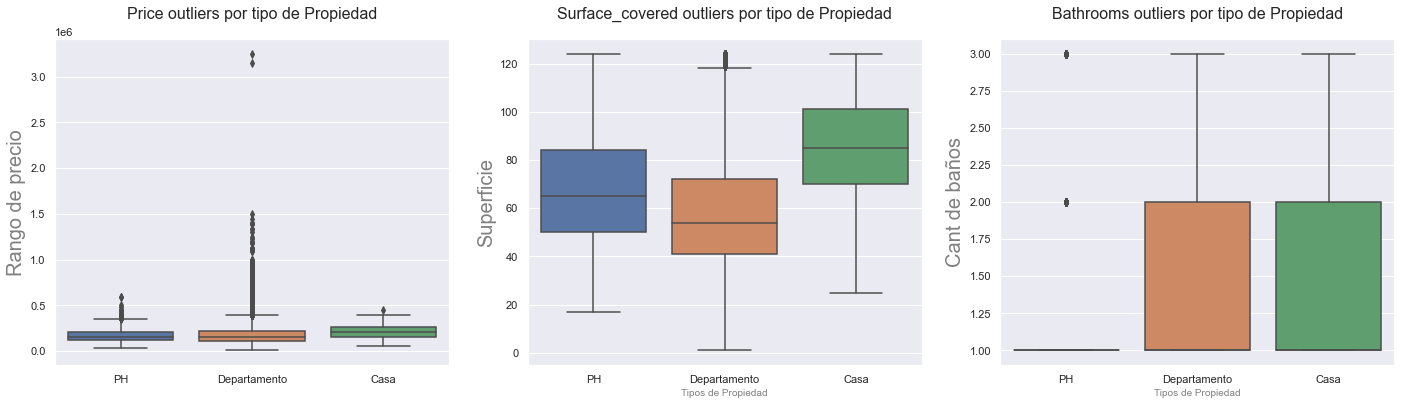

In [20]:
plt.figure(figsize=(24,6))
plt.subplot(1,3,1)
sns.boxplot(data = df, x = 'property_type', y = "price")
plt.title('Price outliers por tipo de Propiedad', weight=10, size = 16, pad = 20)
plt.xlabel('', size = 10, color='gray')
plt.ylabel('Rango de precio', size = 20, color='gray')

plt.subplot(1,3,2)
sns.boxplot(data = df, x = 'property_type', y = "surface_covered")
plt.title('Surface_covered outliers por tipo de Propiedad', weight=10, size = 16, pad = 20)
plt.xlabel('Tipos de Propiedad', size = 10, color='gray')
plt.ylabel('Superficie', size = 20, color='gray')

plt.subplot(1,3,3)
sns.boxplot(data = df, x = 'property_type', y = "bathrooms")
plt.title('Bathrooms outliers por tipo de Propiedad', weight=10, size = 16, pad = 20)
plt.xlabel('Tipos de Propiedad', size = 10, color='gray')
plt.ylabel('Cant de baños', size = 20, color='gray')

#### Definimos una función para la eliminación de los outliers por el metodo IQR.

In [21]:
def remove_outliers_iqr(column, data):
  
    q1 = data[column].quantile(.25)
    q3 = data[column].quantile(.75)
    iqr = q3-q1
    min_iqr = q1-1.5*iqr
    max_iqr = q3+1.5*iqr

    return data.query(f'@min_iqr <= {column} <= @max_iqr')

#### Aplicamos la función sobre las variables donde visualizamos casos raros.

In [22]:
df = remove_outliers_iqr('rooms', df)
df = remove_outliers_iqr('bedrooms', df)
df = remove_outliers_iqr('bathrooms', df)
df = remove_outliers_iqr('surface_total', df)
df = remove_outliers_iqr('surface_covered', df)

In [23]:
df.describe()

lat           lon         rooms      bedrooms     bathrooms  \
count  60317.000000  60317.000000  63348.000000  63348.000000  63348.000000   
mean     -34.598317    -58.436147      2.570957      1.656327      1.286702   
std        0.022881      0.034665      0.865859      0.727393      0.512414   
min      -34.695087    -58.530467      1.000000      0.000000      1.000000   
25%      -34.611626    -58.458167      2.000000      1.000000      1.000000   
50%      -34.599125    -58.433783      3.000000      2.000000      1.000000   
75%      -34.584815    -58.412751      3.000000      2.000000      2.000000   
max      -34.535909    -58.353930      4.000000      3.000000      3.000000   

       surface_total  surface_covered         price  
count   63348.000000     63348.000000  6.334800e+04  
mean       65.466534        58.449028  1.791317e+05  
std        24.957978        21.513060  9.886318e+04  
min        13.000000         1.000000  7.500000e+03  
25%        45.000000        42.000000  1.150000e+05  
50%        61.000000        54.000000  1.550000e+05  
75%        82.000000        72.000000  2.200000e+05  
max       138.000000       119.000000  3.249900e+06

In [24]:
print(color.BOLD + 'Nan values por columna'+ color.END)
print(df.isnull().sum())


Nan values por columna
lat                3031
lon                3031
Ciudad                0
Barrio                0
rooms                 0
bedrooms              0
bathrooms             0
surface_total         0
surface_covered       0
price                 0
property_type         0
dtype: int64


Text(0, 0.5, 'Cant de baños')

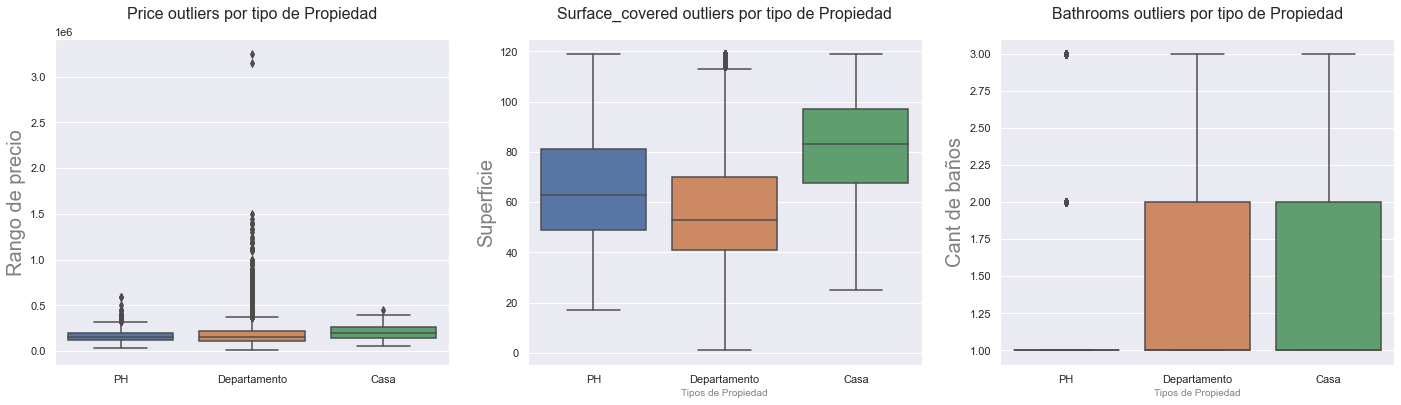

In [25]:
plt.figure(figsize=(24,6))
plt.subplot(1,3,1)
sns.boxplot(data = df, x = 'property_type', y = "price")
plt.title('Price outliers por tipo de Propiedad', weight=10, size = 16, pad = 20)
plt.xlabel('', size = 10, color='gray')
plt.ylabel('Rango de precio', size = 20, color='gray')

plt.subplot(1,3,2)
sns.boxplot(data = df, x = 'property_type', y = "surface_covered")
plt.title('Surface_covered outliers por tipo de Propiedad', weight=10, size = 16, pad = 20)
plt.xlabel('Tipos de Propiedad', size = 10, color='gray')
plt.ylabel('Superficie', size = 20, color='gray')

plt.subplot(1,3,3)
sns.boxplot(data = df, x = 'property_type', y = "bathrooms")
plt.title('Bathrooms outliers por tipo de Propiedad', weight=10, size = 16, pad = 20)
plt.xlabel('Tipos de Propiedad', size = 10, color='gray')
plt.ylabel('Cant de baños', size = 20, color='gray')

#### Se observa que eliminando outliers con el metodo IQR tambien se eliminan Valores faltantes en Bathrooms y Superficies, por lo cual, las rows que tenian errores tambien tenian Nan. Ahora vemos los graficos para superficie total, habitaciones y dormitorios.

Text(0, 0.5, 'surface_total')

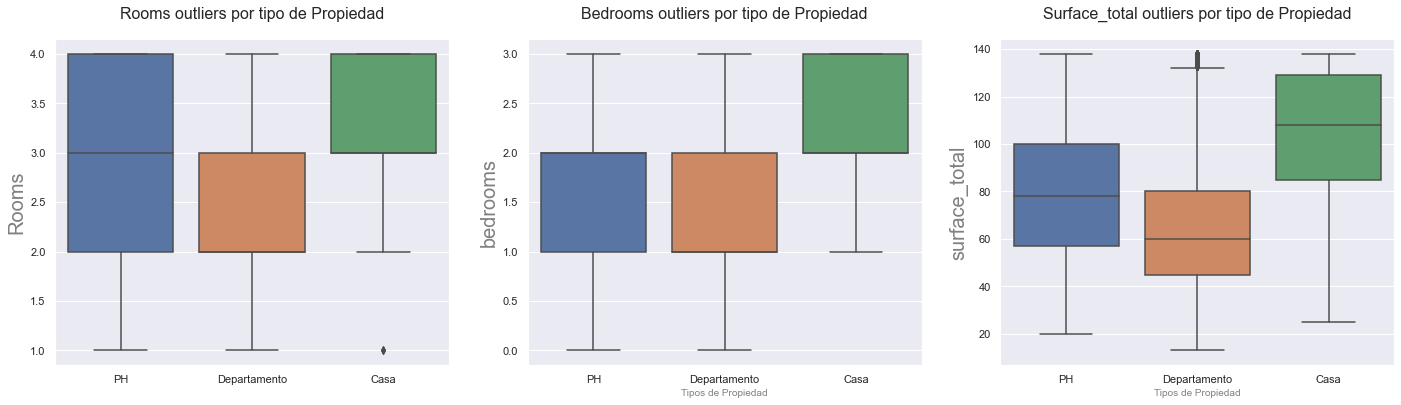

In [26]:
plt.figure(figsize=(24,6))
plt.subplot(1,3,1)
sns.boxplot(data = df, x = 'property_type', y = "rooms")
plt.title('Rooms outliers por tipo de Propiedad', weight=10, size = 16, pad = 20)
plt.xlabel('', size = 10, color='gray')
plt.ylabel('Rooms', size = 20, color='gray')

plt.subplot(1,3,2)
sns.boxplot(data = df, x = 'property_type', y = "bedrooms")
plt.title('Bedrooms outliers por tipo de Propiedad', weight=10, size = 16, pad = 20)
plt.xlabel('Tipos de Propiedad', size = 10, color='gray')
plt.ylabel('bedrooms', size = 20, color='gray')

plt.subplot(1,3,3)
sns.boxplot(data = df, x = 'property_type', y = "surface_total")
plt.title('Surface_total outliers por tipo de Propiedad', weight=10, size = 16, pad = 20)
plt.xlabel('Tipos de Propiedad', size = 10, color='gray')
plt.ylabel('surface_total', size = 20, color='gray')

En terminos generales se observa que el metodo de eliminación de valores sesgados, a eliminado la mayoría del sesgo de las variables. Aún asi se observa que el precio de los departamentos presentan valores alejados de la media. Necesitamos identificar estos valores, para decidir cómo eliminarlos.

In [27]:
depto_raro = (df.property_type.isin(['Departamento'])) & (df.price > 2000000)
df[depto_raro]

lat        lon           Ciudad         Barrio  rooms  bedrooms  \
28275  -34.609558 -58.362674  Capital Federal  Puerto Madero    2.0       1.0   
116213 -34.593645 -58.399170  Capital Federal       Recoleta    3.0       2.0   

        bathrooms  surface_total  surface_covered      price property_type  
28275         1.0           54.0             54.0  3150000.0  Departamento  
116213        2.0           82.0             73.0  3249900.0  Departamento

Si bien , son departamentos ubicados dentro de las xonas más caras de Capital federal, dadas las dimensiones. Es ilogico y sesgaría mucho a la muestra tomas estos casos. Ya que existen departamentos por menos dinero y más metros cuadrados, ubicados en las zonas mencionadas.

In [28]:
df.drop(df[df.property_type.isin(['Departamento']) & (df.price > 2000000)].index, inplace=True) 

Text(0, 0.5, 'Rango de precio en millones')

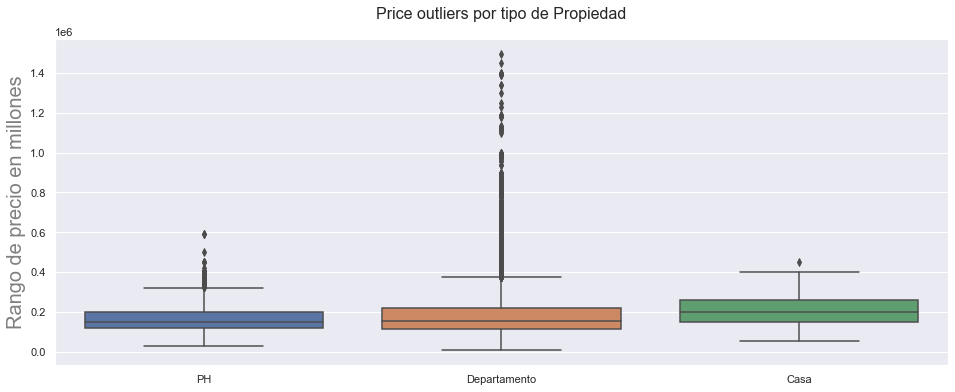

In [29]:
plt.figure(figsize=(16,6))

sns.boxplot(data = df, x = 'property_type', y = "price")
plt.title('Price outliers por tipo de Propiedad', weight=10, size = 16, pad = 20)
plt.xlabel('', size = 10, color='gray')
plt.ylabel('Rango de precio en millones', size = 20, color='gray')

In [30]:
df.describe()

lat           lon         rooms      bedrooms     bathrooms  \
count  60315.000000  60315.000000  63346.000000  63346.000000  63346.000000   
mean     -34.598317    -58.436149      2.570959      1.656332      1.286695   
std        0.022881      0.034664      0.865869      0.727398      0.512413   
min      -34.695087    -58.530467      1.000000      0.000000      1.000000   
25%      -34.611628    -58.458171      2.000000      1.000000      1.000000   
50%      -34.599125    -58.433783      3.000000      2.000000      1.000000   
75%      -34.584814    -58.412758      3.000000      2.000000      2.000000   
max      -34.535909    -58.353930      4.000000      3.000000      3.000000   

       surface_total  surface_covered         price  
count   63346.000000     63346.000000  6.334600e+04  
mean       65.466454        58.448868  1.790363e+05  
std        24.958244        21.513315  9.739627e+04  
min        13.000000         1.000000  7.500000e+03  
25%        45.000000        42.000000  1.150000e+05  
50%        61.000000        54.000000  1.550000e+05  
75%        82.000000        72.000000  2.200000e+05  
max       138.000000       119.000000  1.495000e+06

El metodo intercuartílico al parecer a funcionado de manera correcta, ya que los valores maximos y mínimos no se observan tan alejados de la media.

### 2-Encoding

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63346 entries, 1 to 146553
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lat              60315 non-null  float64
 1   lon              60315 non-null  float64
 2   Ciudad           63346 non-null  object 
 3   Barrio           63346 non-null  object 
 4   rooms            63346 non-null  float64
 5   bedrooms         63346 non-null  float64
 6   bathrooms        63346 non-null  float64
 7   surface_total    63346 non-null  float64
 8   surface_covered  63346 non-null  float64
 9   price            63346 non-null  float64
 10  property_type    63346 non-null  object 
dtypes: float64(8), object(3)
memory usage: 8.3+ MB


In [32]:
from sklearn import preprocessing
df_copy = df

genero variables dummies con la función get_dummies, que  permite eliminar la primera de las columnas generadas para cada característica codificada para evitar la denominada colinealidad

In [33]:
df = pd.get_dummies(df,columns=['property_type']) 

In [35]:
df.describe()

lat           lon         rooms      bedrooms     bathrooms  \
count  60315.000000  60315.000000  63346.000000  63346.000000  63346.000000   
mean     -34.598317    -58.436149      2.570959      1.656332      1.286695   
std        0.022881      0.034664      0.865869      0.727398      0.512413   
min      -34.695087    -58.530467      1.000000      0.000000      1.000000   
25%      -34.611628    -58.458171      2.000000      1.000000      1.000000   
50%      -34.599125    -58.433783      3.000000      2.000000      1.000000   
75%      -34.584814    -58.412758      3.000000      2.000000      2.000000   
max      -34.535909    -58.353930      4.000000      3.000000      3.000000   

       surface_total  surface_covered         price  property_type_Casa  \
count   63346.000000     63346.000000  6.334600e+04        63346.000000   
mean       65.466454        58.448868  1.790363e+05            0.003662   
std        24.958244        21.513315  9.739627e+04            0.060408   
min        13.000000         1.000000  7.500000e+03            0.000000   
25%        45.000000        42.000000  1.150000e+05            0.000000   
50%        61.000000        54.000000  1.550000e+05            0.000000   
75%        82.000000        72.000000  2.200000e+05            0.000000   
max       138.000000       119.000000  1.495000e+06            1.000000   

       property_type_Departamento  property_type_PH  
count                63346.000000      63346.000000  
mean                     0.904903          0.091434  
std                      0.293351          0.288228  
min                      0.000000          0.000000  
25%                      1.000000          0.000000  
50%                      1.000000          0.000000  
75%                      1.000000          0.000000  
max                      1.000000          1.000000

In [36]:
df = pd.get_dummies(df,columns=['Barrio']) 

In [37]:
df.head()

lat        lon           Ciudad  rooms  bedrooms  bathrooms  \
1 -34.624056 -58.412110  Capital Federal    2.0       1.0        2.0   
2 -34.593569 -58.427474  Capital Federal    2.0       1.0        1.0   
3 -34.581294 -58.436754  Capital Federal    2.0       1.0        1.0   
5 -34.593779 -58.441239  Capital Federal    2.0       1.0        1.0   
6 -34.600988 -58.433061  Capital Federal    2.0       1.0        1.0   

   surface_total  surface_covered     price  property_type_Casa  ...  \
1           70.0             58.0  159000.0                   0  ...   
2           45.0             45.0  125000.0                   0  ...   
3           85.0             50.0  295000.0                   0  ...   
5           56.0             56.0  150000.0                   0  ...   
6           70.0             70.0  159500.0                   0  ...   

   Barrio_Villa Lugano  Barrio_Villa Luro  Barrio_Villa Ortuzar  \
1                    0                  0                     0   
2                    0                  0                     0   
3                    0                  0                     0   
5                    0                  0                     0   
6                    0                  0                     0   

   Barrio_Villa Pueyrredón  Barrio_Villa Real  Barrio_Villa Riachuelo  \
1                        0                  0                       0   
2                        0                  0                       0   
3                        0                  0                       0   
5                        0                  0                       0   
6                        0                  0                       0   

   Barrio_Villa Santa Rita  Barrio_Villa Soldati  Barrio_Villa Urquiza  \
1                        0                     0                     0   
2                        0                     0                     0   
3                        0                     0                     0   
5                        0                     0                     0   
6                        0                     0                     0   

   Barrio_Villa del Parque  
1                        0  
2                        0  
3                        0  
5                        0  
6                        0  

[5 rows x 69 columns]

### 3- Imputación de valores faltantes

In [38]:
print(color.BOLD + 'Nan values por columna'+ color.END)
print(df.isnull().sum())


Nan values por columna
lat                        3031
lon                        3031
Ciudad                        0
rooms                         0
bedrooms                      0
                           ... 
Barrio_Villa Riachuelo        0
Barrio_Villa Santa Rita       0
Barrio_Villa Soldati          0
Barrio_Villa Urquiza          0
Barrio_Villa del Parque       0
Length: 69, dtype: int64


Se observa valores faltantes en lat y lon, que ya observamos en los warning del reporte de pandas_profiling. Agrupamos las instancias por la variable Barrio que suponemos correlaciona con lat y lon . Luego, completamos los valores faltantes con el promedio de las instancias que tienen el mismo barrio de residencia. 

In [44]:
gr = df_copy.groupby(["Barrio"])     

t = gr[['Barrio','lat','lon']].mean()
df["lat"].fillna(gr.lat.transform("mean"),inplace=True)
df["lon"].fillna(gr.lon.transform("mean"),inplace=True)  

In [46]:
print(color.BOLD + 'Nan values por columna'+ color.END)
print(df.isnull().sum().head(18))

Nan values por columna
lat                           0
lon                           0
Ciudad                        0
rooms                         0
bedrooms                      0
bathrooms                     0
surface_total                 0
surface_covered               0
price                         0
property_type_Casa            0
property_type_Departamento    0
property_type_PH              0
Barrio_Abasto                 0
Barrio_Agronomía              0
Barrio_Almagro                0
Barrio_Balvanera              0
Barrio_Barracas               0
Barrio_Barrio Norte           0
dtype: int64


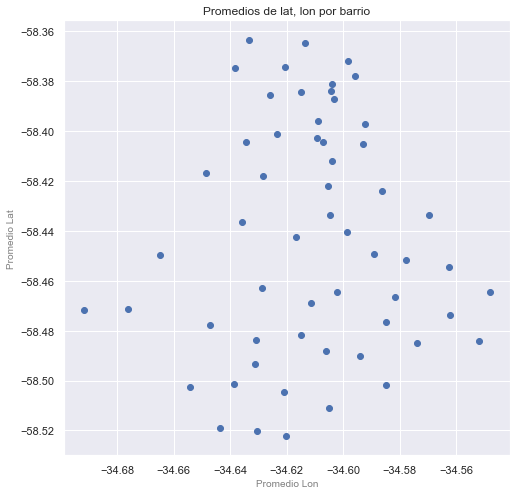

In [50]:
# Para vizualizar que estan todos dentro de Capital Federal

plt.figure(figsize=(8,8))
plt.scatter(t.lat, t.lon)
plt.title('Promedios de lat, lon por barrio')
plt.xlabel('Promedio Lon', size = 10, color='gray')
plt.ylabel('Promedio Lat', size = 10, color='gray')
plt.show()

#### 4- Escalado de datos

In [52]:
print(df.shape)
df.head(1)

(63346, 69)


lat       lon           Ciudad  rooms  bedrooms  bathrooms  \
1 -34.624056 -58.41211  Capital Federal    2.0       1.0        2.0   

   surface_total  surface_covered     price  property_type_Casa  ...  \
1           70.0             58.0  159000.0                   0  ...   

   Barrio_Villa Lugano  Barrio_Villa Luro  Barrio_Villa Ortuzar  \
1                    0                  0                     0   

   Barrio_Villa Pueyrredón  Barrio_Villa Real  Barrio_Villa Riachuelo  \
1                        0                  0                       0   

   Barrio_Villa Santa Rita  Barrio_Villa Soldati  Barrio_Villa Urquiza  \
1                        0                     0                     0   

   Barrio_Villa del Parque  
1                        0  

[1 rows x 69 columns]

In [53]:
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler

In [58]:
# Elimino la columna Ciudad, por que para el escalado me tire un errorde que un string no puede volverse float
df = df.drop(columns=['Ciudad'])

In [59]:
# Separo features y target para MinMax
X_for_scaler = df.drop('price', axis=1)
y_price = df['price']

In [60]:
# MinMax Scaler
scaler = MinMaxScaler()
scaler.fit(X_for_scaler)

MinMaxScaler()

In [61]:
X_scaled = scaler.transform(X_for_scaler)
scaled_df = pd.DataFrame(X_scaled, index=X_for_scaler.index, columns=X_for_scaler.columns)
scaled_df.describe()

lat           lon         rooms      bedrooms     bathrooms  \
count  63346.000000  63346.000000  63346.000000  63346.000000  63346.000000   
mean       0.609358      0.537875      0.523653      0.552111      0.143348   
std        0.142827      0.195402      0.288623      0.242466      0.256207   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.525462      0.417372      0.333333      0.333333      0.000000   
50%        0.605363      0.552465      0.666667      0.666667      0.000000   
75%        0.690728      0.669943      0.666667      0.666667      0.500000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       surface_total  surface_covered  property_type_Casa  \
count   63346.000000     63346.000000        63346.000000   
mean        0.419732         0.486855            0.003662   
std         0.199666         0.182316            0.060408   
min         0.000000         0.000000            0.000000   
25%         0.256000         0.347458            0.000000   
50%         0.384000         0.449153            0.000000   
75%         0.552000         0.601695            0.000000   
max         1.000000         1.000000            1.000000   

       property_type_Departamento  property_type_PH  ...  Barrio_Villa Lugano  \
count                63346.000000      63346.000000  ...         63346.000000   
mean                     0.904903          0.091434  ...             0.004610   
std                      0.293351          0.288228  ...             0.067738   
min                      0.000000          0.000000  ...             0.000000   
25%                      1.000000          0.000000  ...             0.000000   
50%                      1.000000          0.000000  ...             0.000000   
75%                      1.000000          0.000000  ...             0.000000   
max                      1.000000          1.000000  ...             1.000000   

       Barrio_Villa Luro  Barrio_Villa Ortuzar  Barrio_Villa Pueyrredón  \
count       63346.000000          63346.000000             63346.000000   
mean            0.006125              0.003268                 0.008682   
std             0.078024              0.057071                 0.092775   
min             0.000000              0.000000                 0.000000   
25%             0.000000              0.000000                 0.000000   
50%             0.000000              0.000000                 0.000000   
75%             0.000000              0.000000                 0.000000   
max             1.000000              1.000000                 1.000000   

       Barrio_Villa Real  Barrio_Villa Riachuelo  Barrio_Villa Santa Rita  \
count       63346.000000            63346.000000             63346.000000   
mean            0.001452                0.000347                 0.003962   
std             0.038082                0.018633                 0.062823   
min             0.000000                0.000000                 0.000000   
25%             0.000000                0.000000                 0.000000   
50%             0.000000                0.000000                 0.000000   
75%             0.000000                0.000000                 0.000000   
max             1.000000                1.000000                 1.000000   

       Barrio_Villa Soldati  Barrio_Villa Urquiza  Barrio_Villa del Parque  
count          63346.000000          63346.000000             63346.000000  
mean               0.000474              0.040981                 0.015913  
std                0.021757              0.198248                 0.125138  
min                0.000000              0.000000                 0.000000  
25%                0.000000              0.000000                 0.000000  
50%                0.000000              0.000000                 0.000000  
75%                0.000000              0.000000                 0.000000  
max                1.000000           

### 5- Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA)

El análisis de componentes principales (PCA) es una técnica que se utiliza para enfatizar la variación y resaltar patrones sólidos en un conjunto de datos. A menudo se utiliza para que los datos sean fáciles de explorar y visualizar. PCA es un modelo que selecciona las variables que más “peso” tienen dentro de los datos. 

In [62]:
# Duplico Datasets para hacer PCA sobre data con y sin escalado

df_para_pca = df.drop(['price'], axis=1) 
scaled_features_df = scaled_df

price = df['price']

In [63]:
df_para_pca.reset_index(drop=True, inplace=True)

In [64]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

#### Primero hare PCA sobre el Dataset comun y luego sobre el escalado para ver diferentes resultados

#### PCA sobre Data Original

In [65]:
print(df_para_pca.shape)
df_para_pca.describe()

(63346, 67)


lat           lon         rooms      bedrooms     bathrooms  \
count  63346.000000  63346.000000  63346.000000  63346.000000  63346.000000   
mean     -34.598090    -58.435512      2.570959      1.656332      1.286695   
std        0.022735      0.034496      0.865869      0.727398      0.512413   
min      -34.695087    -58.530467      1.000000      0.000000      1.000000   
25%      -34.611445    -58.456786      2.000000      1.000000      1.000000   
50%      -34.598726    -58.432937      3.000000      2.000000      1.000000   
75%      -34.585138    -58.412198      3.000000      2.000000      2.000000   
max      -34.535909    -58.353930      4.000000      3.000000      3.000000   

       surface_total  surface_covered  property_type_Casa  \
count   63346.000000     63346.000000        63346.000000   
mean       65.466454        58.448868            0.003662   
std        24.958244        21.513315            0.060408   
min        13.000000         1.000000            0.000000   
25%        45.000000        42.000000            0.000000   
50%        61.000000        54.000000            0.000000   
75%        82.000000        72.000000            0.000000   
max       138.000000       119.000000            1.000000   

       property_type_Departamento  property_type_PH  ...  Barrio_Villa Lugano  \
count                63346.000000      63346.000000  ...         63346.000000   
mean                     0.904903          0.091434  ...             0.004610   
std                      0.293351          0.288228  ...             0.067738   
min                      0.000000          0.000000  ...             0.000000   
25%                      1.000000          0.000000  ...             0.000000   
50%                      1.000000          0.000000  ...             0.000000   
75%                      1.000000          0.000000  ...             0.000000   
max                      1.000000          1.000000  ...             1.000000   

       Barrio_Villa Luro  Barrio_Villa Ortuzar  Barrio_Villa Pueyrredón  \
count       63346.000000          63346.000000             63346.000000   
mean            0.006125              0.003268                 0.008682   
std             0.078024              0.057071                 0.092775   
min             0.000000              0.000000                 0.000000   
25%             0.000000              0.000000                 0.000000   
50%             0.000000              0.000000                 0.000000   
75%             0.000000              0.000000                 0.000000   
max             1.000000              1.000000                 1.000000   

       Barrio_Villa Real  Barrio_Villa Riachuelo  Barrio_Villa Santa Rita  \
count       63346.000000            63346.000000             63346.000000   
mean            0.001452                0.000347                 0.003962   
std             0.038082                0.018633                 0.062823   
min             0.000000                0.000000                 0.000000   
25%             0.000000                0.000000                 0.000000   
50%             0.000000                0.000000                 0.000000   
75%             0.000000                0.000000                 0.000000   
max             1.000000                1.000000                 1.000000   

       Barrio_Villa Soldati  Barrio_Villa Urquiza  Barrio_Villa del Parque  
count          63346.000000          63346.000000             63346.000000  
mean               0.000474              0.040981                 0.015913  
std                0.021757              0.198248                 0.125138  
min                0.000000              0.000000                 0.000000  
25%                0.000000              0.000000                 0.000000  
50%                0.000000              0.000000                 0.000000  
75%                0.000000              0.000000                 0.000000  
max                1.000000           

In [67]:
%%time

variances = []
individual_variances = []
n_components = np.arange(1, df_para_pca.shape[1])

for i in n_components: 
    pca_loop = PCA(n_components=i)
    df_pca_loop = pca_loop.fit_transform(df_para_pca)
    variance_ratio = pca_loop.explained_variance_ratio_
    individual_variances.append(variance_ratio)
    variances.append(variance_ratio.sum())

Wall time: 36.1 s


C:\Users\Usuario\anaconda3\envs\Karstec\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Varianza de cada componente'}, xlabel='Componente', ylabel='Varianza'>

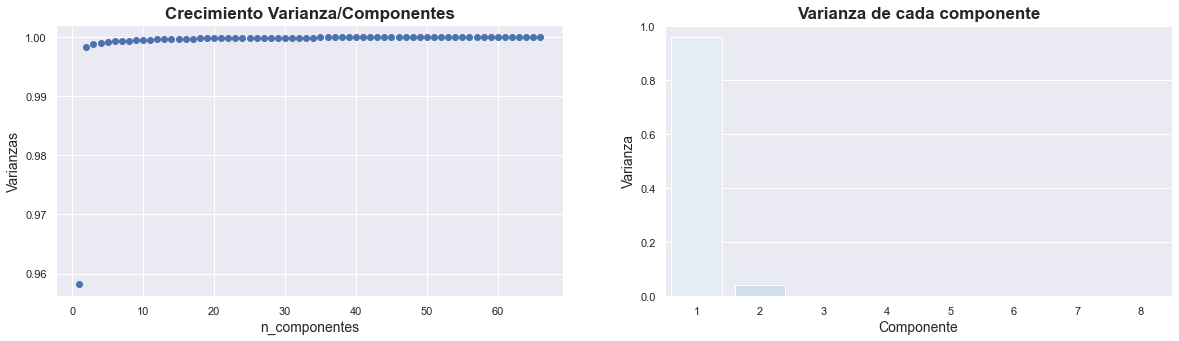

In [68]:
font_title = dict(fontsize=17, fontweight='bold')
font_axis = dict(fontsize=14)
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.xlabel('n_componentes', fontdict=font_axis)
plt.ylabel('Varianzas', fontdict=font_axis)
plt.title('Crecimiento Varianza/Componentes', fontdict=font_title)
plt.plot(n_components, variances,'o')

plt.subplot(1, 2, 2)
k = 8

plt.title('Varianza de cada componente', fontdict=font_title)
plt.xlabel('Componente', fontdict=font_axis)
plt.ylabel('Varianza', fontdict=font_axis)
sns.barplot(np.arange(1, k+1), individual_variances[k-1], palette='Blues')

#### PCA sobre Data Escalada

In [69]:
%%time

variances = []
individual_variances = []
n_components = np.arange(1, scaled_features_df.shape[1])

for i in n_components: 
    pca_loop = PCA(n_components=i)
    data_pca_loop = pca_loop.fit_transform(scaled_features_df)
    variance_ratio = pca_loop.explained_variance_ratio_
    individual_variances.append(variance_ratio)
    variances.append(variance_ratio.sum())

Wall time: 41.3 s


C:\Users\Usuario\anaconda3\envs\Karstec\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Varianza de cada componente'}, xlabel='Componente', ylabel='Varianza'>

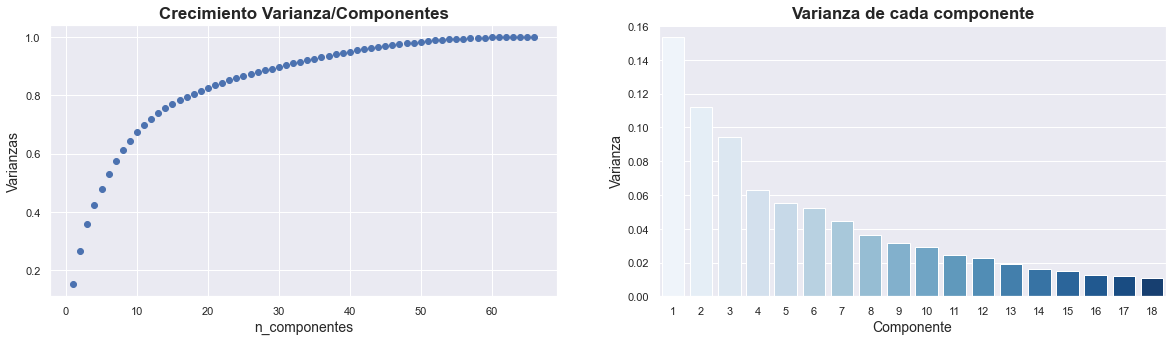

In [70]:
font_title = dict(fontsize=17, fontweight='bold')
font_axis = dict(fontsize=14)
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.xlabel('n_componentes', fontdict=font_axis)
plt.ylabel('Varianzas', fontdict=font_axis)
plt.title('Crecimiento Varianza/Componentes', fontdict=font_title)
plt.plot(n_components, variances,'o')

plt.subplot(1, 2, 2)
k = 18

plt.title('Varianza de cada componente', fontdict=font_title)
plt.xlabel('Componente', fontdict=font_axis)
plt.ylabel('Varianza', fontdict=font_axis)
sns.barplot(np.arange(1, k+1), individual_variances[k-1], palette='Blues')

Sobre la data Escalada se observa que con 30 features estaria al 90% de varianza. Es el número mínimo de componentes que resultan suficientes para explicar los datos y donde  el incremento de la proporción de varianza explicada acumulada deja de ser sustancial.

In [72]:
scaled_features_df.shape

(63346, 67)

In [73]:
pca = PCA(n_components=30)
data_pca_sc = pca.fit_transform(scaled_features_df)

In [79]:
df_final = pd.DataFrame(data=data_pca_sc, 
                           columns=['principal component 1','principal component 2','principal component 3','principal component 4',
                                    'principal component 5','principal component 6','principal component 7','principal component 8',
                                    'principal component 9','principal component 10',
                                    'principal component 11','principal component 12','principal component 13','principal component 14',
                                    'principal component 15','principal component 16','principal component 17','principal component 18',
                                    'principal component 19','principal component 20',
                                    'principal component 21','principal component 22','principal component 23','principal component 24',
                                    'principal component 25','principal component 26','principal component 27','principal component 28',
                                    'principal component 29','principal component 30'])

In [80]:
df_final.shape

(63346, 30)

In [81]:
price = pd.DataFrame(data=price, columns=['price'])

In [82]:
price.reset_index(drop=True, inplace=True)

In [83]:
df_final['price'] = price
df_final.shape

(63346, 31)

In [84]:
df_final

principal component 1  principal component 2  principal component 3  \
0                   0.456867               1.132539               0.173521   
1                   0.141172               1.087133               1.115927   
2                   0.267843               1.044304               1.122620   
3                   0.227420               1.344534               0.052030   
4                   0.305503               1.309884               0.052385   
...                      ...                    ...                    ...   
63341               0.243814              -0.472891               0.817504   
63342               0.243814              -0.472891               0.817504   
63343               0.687121               0.864324               1.109063   
63344               0.676927              -0.642921               0.801165   
63345               0.690642              -0.650010               0.802538   

       principal component 4  principal component 5  principal component 6  \
0                   0.071085              -0.111315               0.011406   
1                   0.171871              -0.015930               0.033896   
2                   0.136468              -0.027684               0.070706   
3                  -0.260051               0.740396               0.017044   
4                  -0.255605               0.747034              -0.002054   
...                      ...                    ...                    ...   
63341              -0.007220               0.041263              -0.007257   
63342              -0.007220               0.041263              -0.007257   
63343               0.121048               0.020890               0.051841   
63344              -0.037548               0.079914              -0.013949   
63345              -0.038239               0.080543              -0.013073   

       principal component 7  principal component 8  principal component 9  \
0                   0.241970              -0.158933               0.243539   
1                   0.035311              -0.200805               0.080639   
2                   0.020389              -0.173289               0.120524   
3                  -0.055343              -0.297198               0.189524   
4                  -0.029406              -0.310145               0.187433   
...                      ...                    ...                    ...   
63341              -0.070646              -0.006140               0.151600   
63342              -0.070646              -0.006140               0.151600   
63343               0.008854              -0.147840              -0.023341   
63344              -0.109821               0.048095               0.020782   
63345              -0.105227               0.045354               0.022684   

       principal component 10  ...  principal component 22  \
0                    0.492373  ...               -0.057895   
1                    0.052827  ...                0.017354   
2                    0.046339  ...               -0.009242   
3                    0.092414  ...                0.013056   
4                    0.110574  ...               -0.004165   
...                       ...  ...                     ...   
63341                0.125951  ...               -0.011596   
63342                0.125951  ...               -0.011596   
63343               -0.100140  ...                0.006207   
63344               -0.031949  ...               -0.012112   
63345               -0.029496  ...               -0.013235   

       principal component 23  principal component 24  principal component 25  \
0                   -0.054094               -0.160644               -0.204444   
1                   -0.022869               -0.009640                0.022536   
2                    0.035158                0.012983               -0.031564   
3                    0.007227                0.012466               -0.014831   
4                    0.037284                0

#### 6- . Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - y evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Sea cual sea la respuesta, intenta explicar a qué se debe.

In [85]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [87]:
df.corr(method = 'spearman').style.background_gradient(cmap='coolwarm') 

In [89]:
# Creo una funcion para graficar distribucion de errores y evaluar el dataset.

def dist_errors(model, model_name, hasReg=False):
    if hasReg:
        y_train_pred = model.predict(X_train_new)
        y_test_pred = model.predict(X_test_new)
    else:
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
    print(f'Modelo: {model_name}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    sns.distplot(y_train - y_train_pred, bins=15, label='train')  # ver 
    sns.distplot(y_test - y_test_pred, bins=15, label='test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1, 2, 2)
    ax.scatter(y_test, y_test_pred, s=2)

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')

    plt.tight_layout()
    plt.show()

In [90]:
X = df.drop(['price'], axis=1)
y = df.price
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.3, random_state=42)

In [91]:
tree_model = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 5542.249803390347
Raíz del error cuadrático medio en Test: 37402.21160195899


C:\Users\Usuario\anaconda3\envs\Karstec\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\anaconda3\envs\Karstec\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


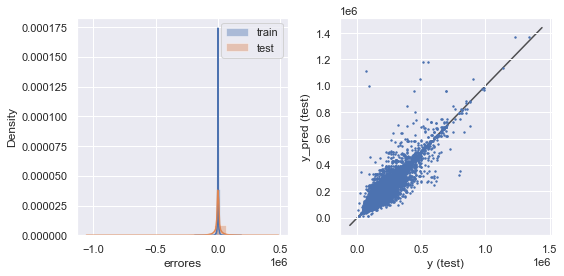

In [92]:
dist_errors(tree_model, 'Árbol de Decisión')

Se observa una importate respecto al **proyecto 1** del Modelo Tree Regressor simple. Obtuvimo un RMS de **usd 146.092,76** en el proyecto 1 contra **usd 37.402,21** que obtuvimos ahora. 

#### Ahora con los datos escalados

In [93]:
print(scaled_features_df.shape)
scaled_features_df.head()

(63346, 67)


lat       lon     rooms  bedrooms  bathrooms  surface_total  \
1  0.446237  0.670438  0.333333  0.333333        0.5          0.456   
2  0.637763  0.583409  0.333333  0.333333        0.0          0.256   
3  0.714877  0.530842  0.333333  0.333333        0.0          0.576   
5  0.636443  0.505438  0.333333  0.333333        0.0          0.344   
6  0.591154  0.551759  0.333333  0.333333        0.0          0.456   

   surface_covered  property_type_Casa  property_type_Departamento  \
1         0.483051                 0.0                         0.0   
2         0.372881                 0.0                         0.0   
3         0.415254                 0.0                         0.0   
5         0.466102                 0.0                         0.0   
6         0.584746                 0.0                         0.0   

   property_type_PH  ...  Barrio_Villa Lugano  Barrio_Villa Luro  \
1               1.0  ...                  0.0                0.0   
2               1.0  ...                  0.0                0.0   
3               1.0  ...                  0.0                0.0   
5               1.0  ...                  0.0                0.0   
6               1.0  ...                  0.0                0.0   

   Barrio_Villa Ortuzar  Barrio_Villa Pueyrredón  Barrio_Villa Real  \
1                   0.0                      0.0                0.0   
2                   0.0                      0.0                0.0   
3                   0.0                      0.0                0.0   
5                   0.0                      0.0                0.0   
6                   0.0                      0.0                0.0   

   Barrio_Villa Riachuelo  Barrio_Villa Santa Rita  Barrio_Villa Soldati  \
1                     0.0                      0.0                   0.0   
2                     0.0                      0.0                   0.0   
3                     0.0                      0.0                   0.0   
5                     0.0                      0.0                   0.0   
6                     0.0                      0.0                   0.0   

   Barrio_Villa Urquiza  Barrio_Villa del Parque  
1                   0.0                      0.0  
2                   0.0                      0.0  
3                   0.0                      0.0  
5                   0.0                      0.0  
6                   0.0                      0.0  

[5 rows x 67 columns]

In [94]:
price

price
0      159000.0
1      125000.0
2      295000.0
3      150000.0
4      159500.0
...         ...
63341  585000.0
63342  475000.0
63343  178000.0
63344  660000.0
63345  620000.0

[63346 rows x 1 columns]

In [96]:
X = scaled_features_df
y = df.price.values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.3, random_state=42)

In [97]:
tree_model_2 = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

Modelo: Árbol de Decisión escalado
Raíz del error cuadrático medio en Train: 5513.288390490813
Raíz del error cuadrático medio en Test: 38909.45944769007


C:\Users\Usuario\anaconda3\envs\Karstec\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\anaconda3\envs\Karstec\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


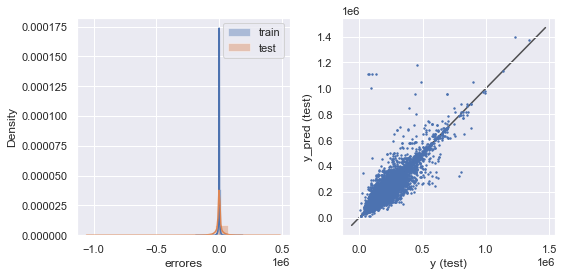

In [98]:
dist_errors(tree_model_2, 'Árbol de Decisión escalado')

#### Ahora escalado + pca

In [99]:
X = df_final.drop(['price'], axis=1)
y = df.price.values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.3, random_state=42)

In [101]:
tree_model_3 = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

Modelo: Árbol de Decisión escalado + PCA
Raíz del error cuadrático medio en Train: 5513.288390490813
Raíz del error cuadrático medio en Test: 40097.542851007485


C:\Users\Usuario\anaconda3\envs\Karstec\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\anaconda3\envs\Karstec\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


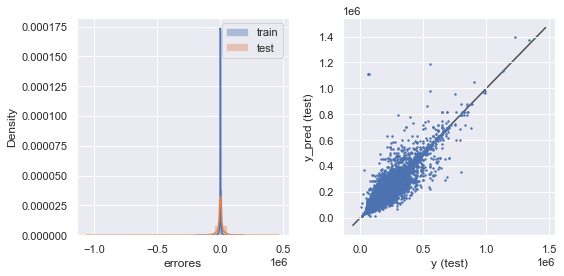

In [102]:
dist_errors(tree_model_3, 'Árbol de Decisión escalado + PCA')

El RMSE a aumentado del dataset original al escalado y aun más del escalado y PCA, no mejoro el desempeño. Por lo que el mejor desempeño, se produce con los datos originales, sin reducción de dimensionalidad y sin escalar. Puedo suponer, que al no ser un dataset de dimensión extramadamente grande. El modelo tiene mas certeza (menos error) al contar con la mayoría de la información del universo. Y el hecho de la eliminación de los sesgos y la imputación de los valores faltantes. Mejoraron mucho el modelo , en comparación al proyecto 1

# Parte B: Machine Learning

### 6- Elige dos de los modelos avanzados vistos 


In [106]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score

#### - Random Forest y XGBoost

In [108]:
scaled_features_df.head(15)

lat       lon     rooms  bedrooms  bathrooms  surface_total  \
1   0.446237  0.670438  0.333333  0.333333        0.5          0.456   
2   0.637763  0.583409  0.333333  0.333333        0.0          0.256   
3   0.714877  0.530842  0.333333  0.333333        0.0          0.576   
5   0.636443  0.505438  0.333333  0.333333        0.0          0.344   
6   0.591154  0.551759  0.333333  0.333333        0.0          0.456   
7   0.591154  0.551759  0.333333  0.333333        0.0          0.456   
8   0.348593  0.627945  0.000000  0.333333        0.0          0.256   
9   0.348593  0.627945  0.000000  0.333333        0.0          0.256   
10  0.683899  0.193998  0.333333  0.333333        0.5          0.424   
11  0.574224  0.843507  0.333333  0.333333        0.0          0.440   
12  0.406701  0.641478  0.333333  0.333333        0.0          0.296   
20  0.545558  0.488314  0.333333  0.333333        0.0          0.144   
21  0.572925  0.676737  0.000000  0.333333        0.0          0.072   
22  0.432516  0.387391  0.333333  0.333333        0.0          0.256   
23  0.436466  0.385555  0.333333  0.333333        0.0          0.256   

    surface_covered  property_type_Casa  property_type_Departamento  \
1          0.483051                 0.0                         0.0   
2          0.372881                 0.0                         0.0   
3          0.415254                 0.0                         0.0   
5          0.466102                 0.0                         0.0   
6          0.584746                 0.0                         0.0   
7          0.584746                 0.0                         0.0   
8          0.305085                 0.0                         0.0   
9          0.305085                 0.0                         0.0   
10         0.406780                 0.0                         0.0   
11         0.491525                 0.0                         1.0   
12         0.364407                 0.0                         1.0   
20         0.254237                 0.0                         1.0   
21         0.177966                 0.0                         1.0   
22         0.372881                 0.0                         1.0   
23         0.372881                 0.0                         1.0   

    property_type_PH  ...  Barrio_Villa Lugano  Barrio_Villa Luro  \
1                1.0  ...                  0.0                0.0   
2                1.0  ...                  0.0                0.0   
3                1.0  ...                  0.0                0.0   
5                1.0  ...                  0.0                0.0   
6                1.0  ...                  0.0                0.0   
7                1.0  ...                  0.0                0.0   
8                1.0  ...                  0.0                0.0   
9                1.0  ...                  0.0                0.0   
10               1.0  ...                  0.0                0.0   
11               0.0  ...                  0.0                0.0   
12               0.0  ...                  0.0                0.0   
20               0.0  ...                  0.0                0.0   
21               0.0  ...                  0.0                0.0   
22               0.0  ...                  0.0                0.0   
23               0.0  ...                  0.0                0.0   

    Barrio_Villa Ortuzar  Barrio_Villa Pueyrredón  Barrio_Villa Real  \
1                    0.0                      0.0                0.0   
2                    0.0                      0.0                0.0   
3                    0.0                      0.0                0.0   
5                    0.0                      0.0                0.0   
6                    0.0                      0.0                0.0   
7                    0.0                      0.0                0.0   
8                    0.0                      0.0                0.0   
9                    0.0              

In [109]:
price.shape

(63346, 1)

In [110]:
price.reindex

<bound method DataFrame.reindex of           price
0      159000.0
1      125000.0
2      295000.0
3      150000.0
4      159500.0
...         ...
63341  585000.0
63342  475000.0
63343  178000.0
63344  660000.0
63345  620000.0

[63346 rows x 1 columns]>

In [111]:
scaled_features_df['price'] = price.values

In [112]:
scaled_features_df.shape

(63346, 68)

In [113]:
scaled_features_df.head()

lat       lon     rooms  bedrooms  bathrooms  surface_total  \
1  0.446237  0.670438  0.333333  0.333333        0.5          0.456   
2  0.637763  0.583409  0.333333  0.333333        0.0          0.256   
3  0.714877  0.530842  0.333333  0.333333        0.0          0.576   
5  0.636443  0.505438  0.333333  0.333333        0.0          0.344   
6  0.591154  0.551759  0.333333  0.333333        0.0          0.456   

   surface_covered  property_type_Casa  property_type_Departamento  \
1         0.483051                 0.0                         0.0   
2         0.372881                 0.0                         0.0   
3         0.415254                 0.0                         0.0   
5         0.466102                 0.0                         0.0   
6         0.584746                 0.0                         0.0   

   property_type_PH  ...  Barrio_Villa Luro  Barrio_Villa Ortuzar  \
1               1.0  ...                0.0                   0.0   
2               1.0  ...                0.0                   0.0   
3               1.0  ...                0.0                   0.0   
5               1.0  ...                0.0                   0.0   
6               1.0  ...                0.0                   0.0   

   Barrio_Villa Pueyrredón  Barrio_Villa Real  Barrio_Villa Riachuelo  \
1                      0.0                0.0                     0.0   
2                      0.0                0.0                     0.0   
3                      0.0                0.0                     0.0   
5                      0.0                0.0                     0.0   
6                      0.0                0.0                     0.0   

   Barrio_Villa Santa Rita  Barrio_Villa Soldati  Barrio_Villa Urquiza  \
1                      0.0                   0.0                   0.0   
2                      0.0                   0.0                   0.0   
3                      0.0                   0.0                   0.0   
5                      0.0                   0.0                   0.0   
6                      0.0                   0.0                   0.0   

   Barrio_Villa del Parque     price  
1                      0.0  159000.0  
2                      0.0  125000.0  
3                      0.0  295000.0  
5                      0.0  150000.0  
6                      0.0  159500.0  

[5 rows x 68 columns]

In [114]:
print(color.BOLD + 'Nan values por columna'+ color.END)
print(scaled_features_df.isnull().sum().tail(1))

Nan values por columna
price    0
dtype: int64


In [115]:
X = scaled_features_df.drop(['price'], axis=1)
y = scaled_features_df.price
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.3, random_state=42)

In [116]:
# RandomForestRegressor
randomForest = RandomForestRegressor(random_state=42)

# XGBRegressor
xgbRegressor = XGBRegressor(random_state=42)

In [ ]:
# Cross Validation

##%%time

n_cv = 4    

# CV RandomForest
randomForest_scores = cross_val_score(randomForest, X, y, n_jobs=-1, cv=n_cv)  

# CV XGBRegressor
xgbRegressor_scores = cross_val_score(xgbRegressor, X, y, n_jobs=-1, cv=n_cv)  

In [118]:
models=['RandomForest', 'XGBRegressor']
for name, model_score in zip(models,[randomForest_scores, xgbRegressor_scores]):
    print(f"Accuracy para {name}: %0.2f (+/- %0.2f)" % (model_score.mean(), model_score.std() * 2))  #REVISAR

NameError: name 'randomForest_scores' is not defined